In [4]:
# importing the required libraries
library(keras)
library(abind)
library(grid)

In [15]:
# importing data and dividing into training and test data
data = dataset_mnist()
x_train = data$train$x
x_test = data$test$x
cat("Train data dimnsions",dim(x_train),"\n")
cat("Test data dimnsions",dim(x_test))

Train data dimnsions 60000 28 28 
Test data dimnsions 10000 28 28

In [16]:
x_train[1,,]

0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,175,26,166,255,247,127,0,0,0,0
0,0,0,0,0,0,0,0,30,36,⋯,225,172,253,242,195,64,0,0,0,0
0,0,0,0,0,0,0,49,238,253,⋯,93,82,82,56,39,0,0,0,0,0
0,0,0,0,0,0,0,18,219,253,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,80,156,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,14,⋯,0,0,0,0,0,0,0,0,0,0


In [5]:
# normalizing values between 0 and 1
x_train = x_train/ 255
x_test = x_test / 255

x_train <- array_reshape(x_train, c(nrow(x_train), 784))
x_test <- array_reshape(x_test, c(nrow(x_test), 784))

In [1]:
# building the autoencoder model
encoding_dim = 32
input_img = layer_input(shape=c(784),name = "input")

# "encoded" is the encoded representation of the input
encoded = input_img %>% layer_dense(units = encoding_dim, activation='relu',name = "encoder")
decoded = encoded %>% layer_dense(units = c(784), activation='sigmoid',name = "decoder")
# this model maps an input to its reconstruction
autoencoder = keras_model(input_img, decoded)

In [9]:
# summary of the model
summary(autoencoder)

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
input (InputLayer)                  (None, 784)                     0           
________________________________________________________________________________
encoder (Dense)                     (None, 32)                      25120       
________________________________________________________________________________
decoder (Dense)                     (None, 784)                     25872       
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
________________________________________________________________________________


4. We then compile and fit our model.

In [ ]:
# compiling the model
autoencoder %>% compile(optimizer='adadelta', loss='binary_crossentropy')

# training the model
autoencoder %>% fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=TRUE,
                validation_data=list(x_test, x_test))

In [10]:
# predicting the output of the model on test data
predicted <- autoencoder %>% predict(x_test)

In [25]:
options(repr.plot.width=10, repr.plot.height=1)

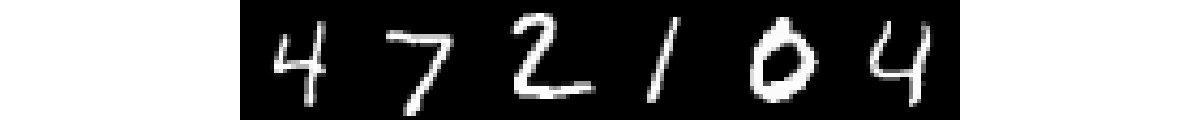

In [31]:
grid = array_reshape(x_test[20,],dim = c(28,28))
for(i in seq(1,5)){
    grid = abind(grid,array_reshape(x_test[i,],dim = c(28,28)),along = 2)
}

grid.raster(grid,interpolate=FALSE)

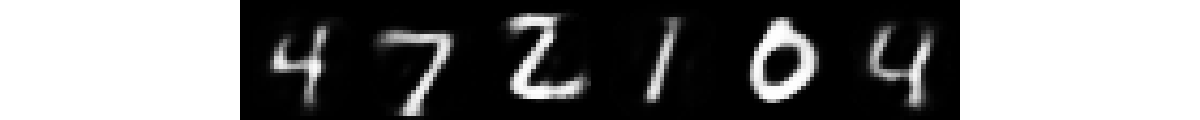

In [32]:
grid1 = array_reshape(predicted[20,],dim = c(28,28))
for(i in seq(1,5)){
    grid1 = abind(grid1,array_reshape(predicted[i,],dim = c(28,28)),along = 2)
}

grid.raster(grid1, interpolate=FALSE)

### There is  more...

### Convolutional autoencoder

In [ ]:
x_train = x_train/ 255
x_test = x_test / 255

x_train = array_reshape(x_train, c(nrow(x_train), 28,28,1))
x_test = array_reshape(x_test, c(nrow(x_test), 28,28,1))

In [ ]:
input_img = layer_input(shape=c(28, 28, 1)) 

In [ ]:
x = input_img %>% layer_conv_2d(32, c(3, 3), activation='relu', padding='same')
x = x %>% layer_max_pooling_2d(c(2, 2), padding='same')
x = x %>% layer_conv_2d(18, c(3, 3), activation='relu', padding='same')
x = x %>%layer_max_pooling_2d(c(2, 2), padding='same')
x = x %>% layer_conv_2d(8, c(3, 3), activation='relu', padding='same')
encoded = x %>% layer_max_pooling_2d(c(2, 2), padding='same')

In [ ]:

x = encoded %>% layer_conv_2d(8, c(3, 3), activation='relu', padding='same')
x = x %>% layer_upsampling_2d(c(2, 2))
x = x %>% layer_conv_2d(8, c(3, 3), activation='relu', padding='same')
x = x %>% layer_upsampling_2d(c(2, 2))
x = x %>% layer_conv_2d(16, c(3, 3), activation='relu')
x = x %>% layer_upsampling_2d(c(2, 2))
decoded = x %>% layer_conv_2d(1, c(3, 3), activation='sigmoid', padding='same')

autoencoder = keras_model(input_img, decoded)
summary(autoencoder)

In [ ]:
autoencoder %>% compile(optimizer='adadelta', loss='binary_crossentropy')

In [ ]:
autoencoder %>% fit(x_train, x_train,
                epochs=20,
                batch_size=128,
                validation_data=list(x_test, x_test))

In [ ]:
save_model_hdf5(autoencoder,"convolutional_autoencoder.h5")

In [ ]:
predicted <- autoencoder %>% predict(x_test)

In [ ]:
dim(x_test)

In [ ]:
options(repr.plot.width=10, repr.plot.height=1)

In [ ]:
grid = x_test[20,,,]
for(i in seq(1,5)){
    grid = abind(grid,x_test[i,,,],along = 2)
}

grid.raster(grid, interpolate=FALSE)

In [ ]:
grid1 = predicted[20,,,]
for(i in seq(1,5)){
    grid1 = abind(grid1,predicted[i,,,],along = 2)
}

grid.raster(grid1, interpolate=FALSE)